<a href="https://colab.research.google.com/github/kshitijagarwal183/Codsoft/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOVIE RATING PREDICTION WITH PYTHON

          Duration       Rating        Votes
count  7919.000000  7919.000000  7919.000000
mean    132.739866     5.841621   105.978280
std      22.838302     1.381777   179.560981
min      21.000000     1.100000     5.000000
25%     124.000000     4.900000    16.000000
50%     134.000000     6.000000    35.000000
75%     143.000000     6.800000    89.000000
max     321.000000    10.000000   999.000000


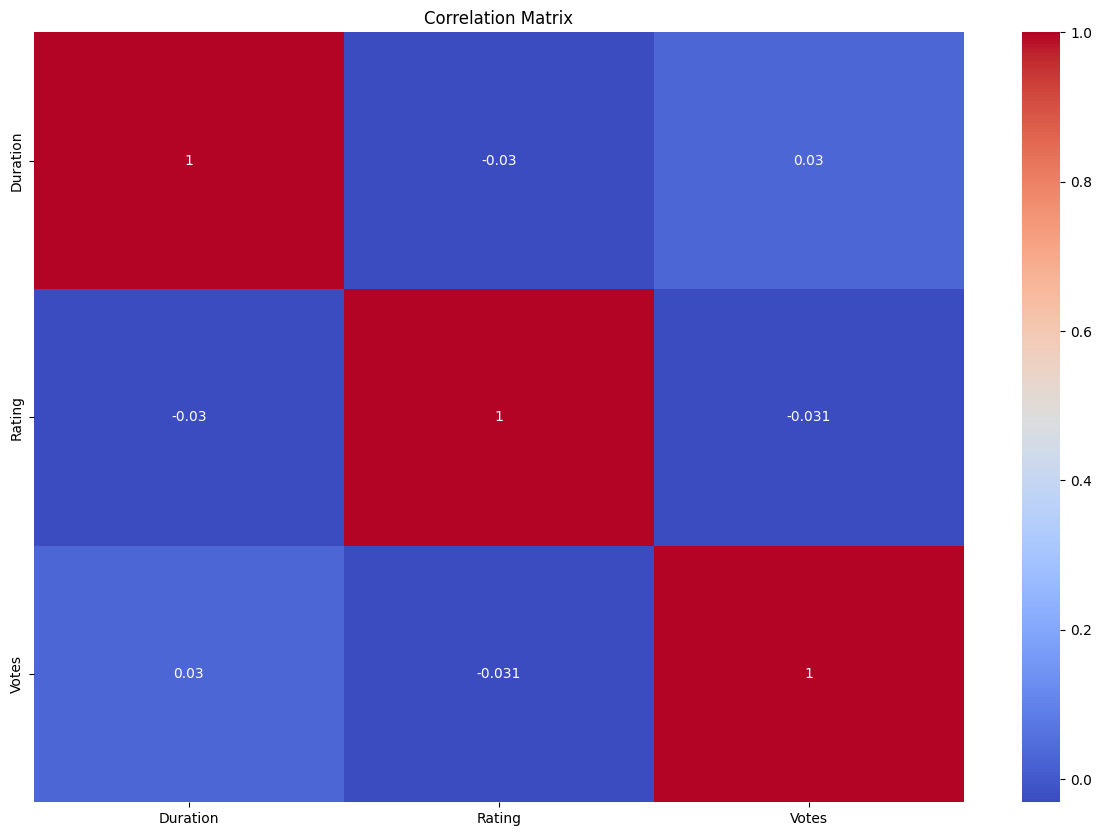

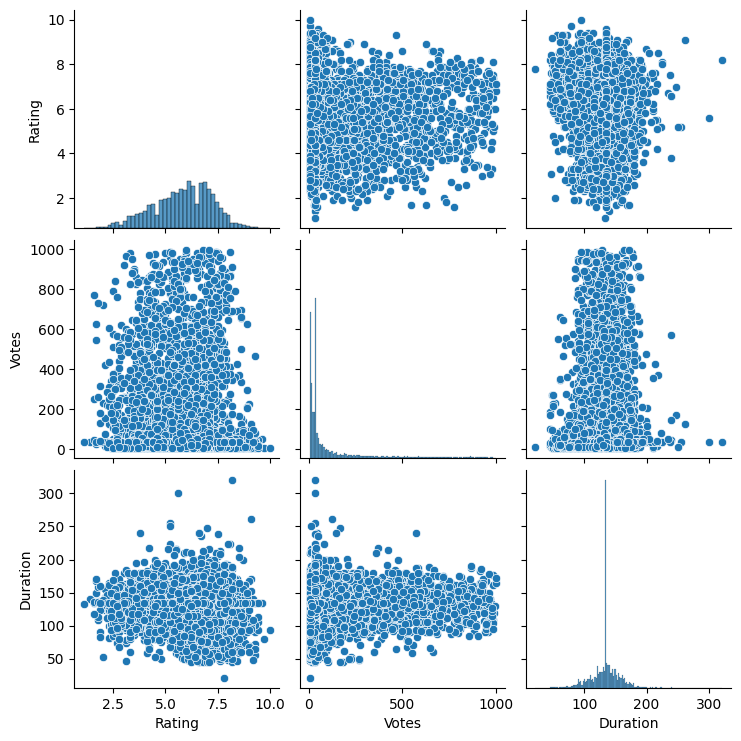

Training RMSE: 1.229902854762463
Testing RMSE: 1.3839013952279844
Training R^2: 0.16686842032065752
Testing R^2: -0.0570590303072791


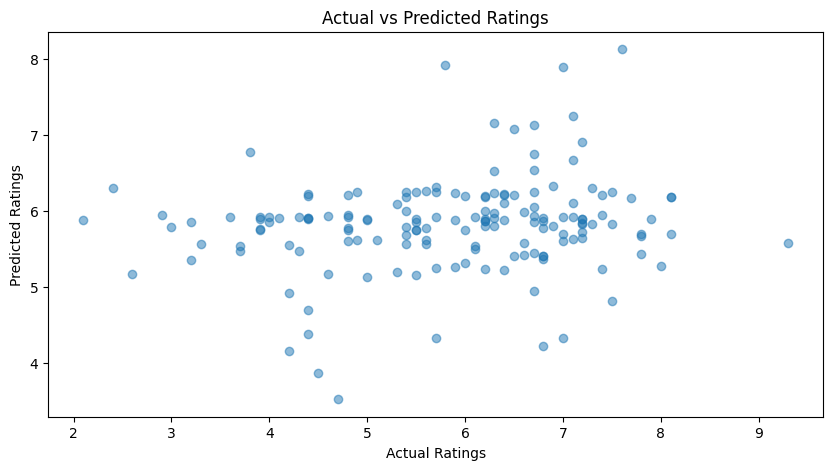

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/IMDb Movies India.csv'
movies_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Drop rows with missing 'Rating' values
movies_df = movies_df.dropna(subset=['Rating'])

# Convert 'Votes' to numeric, replacing non-numeric entries with NaN and then filling NaN with the median value
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'], errors='coerce')
movies_df['Votes'] = movies_df['Votes'].fillna(movies_df['Votes'].median())

# Convert 'Duration' to numeric (extracting the number of minutes)
movies_df['Duration'] = movies_df['Duration'].str.extract('(\d+)').astype(float)

# Fill missing 'Duration' values with the median value
movies_df['Duration'] = movies_df['Duration'].fillna(movies_df['Duration'].median())

# Fill missing values in categorical columns with a placeholder value 'Unknown'
movies_df['Genre'] = movies_df['Genre'].fillna('Unknown')
movies_df['Director'] = movies_df['Director'].fillna('Unknown')
movies_df['Actor 1'] = movies_df['Actor 1'].fillna('Unknown')
movies_df['Actor 2'] = movies_df['Actor 2'].fillna('Unknown')
movies_df['Actor 3'] = movies_df['Actor 3'].fillna('Unknown')

# One-hot encode categorical features with a limited number of unique values to avoid too many features
top_n_genres = movies_df['Genre'].value_counts().index[:10]
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: x if x in top_n_genres else 'Other')

top_n_directors = movies_df['Director'].value_counts().index[:10]
movies_df['Director'] = movies_df['Director'].apply(lambda x: x if x in top_n_directors else 'Other')

top_n_actors1 = movies_df['Actor 1'].value_counts().index[:10]
movies_df['Actor 1'] = movies_df['Actor 1'].apply(lambda x: x if x in top_n_actors1 else 'Other')

top_n_actors2 = movies_df['Actor 2'].value_counts().index[:10]
movies_df['Actor 2'] = movies_df['Actor 2'].apply(lambda x: x if x in top_n_actors2 else 'Other')

top_n_actors3 = movies_df['Actor 3'].value_counts().index[:10]
movies_df['Actor 3'] = movies_df['Actor 3'].apply(lambda x: x if x in top_n_actors3 else 'Other')

# One-hot encode the reduced categorical features
movies_df = pd.get_dummies(movies_df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Drop non-numeric columns
numeric_cols = movies_df.select_dtypes(include=[np.number]).columns.tolist()

# Exploratory Data Analysis (EDA)
# Display basic statistics of the dataframe
print(movies_df.describe())

# Correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = movies_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships between features
sns.pairplot(movies_df[['Rating', 'Votes', 'Duration']])
plt.show()

# Building the Movie Rating Prediction Model
# Define the feature matrix (X) and target vector (y)
X = movies_df.drop(columns=['Name', 'Year', 'Rating'])
y = movies_df['Rating']

# Use a sample of the dataset to speed up training
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Split the sample data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

# Plotting actual vs predicted ratings
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()
